In [2]:
from openpyxl import Workbook, load_workbook
from datetime import datetime
import speedtest
import pandas as pd
import time

In [4]:
def measure_and_update_speed_excel():
    st = speedtest.Speedtest()
    st.get_best_server()

    download_speed = st.download() / 1024 / 1024  # Convert to Mbps
    upload_speed = st.upload() / 1024 / 1024  # Convert to Mbps

    # Get the current date and time
    date_time = datetime.now()

    # Create a DataFrame
    data = {'Download Speed (Mbps)': [download_speed],
            'Upload Speed (Mbps)': [upload_speed],
            'Date-Time': [date_time]}

    df = pd.DataFrame(data)

    # Convert DataFrame to Excel
    excel_file = "internet_speeds.xlsx"
    try:
        existing_data = pd.read_excel(excel_file)
        combined_df = pd.concat([existing_data, df], ignore_index=True)
    except FileNotFoundError:
        combined_df = df

    combined_df.to_excel(excel_file, index=False)
    print("Speed data written to Excel.")

In [5]:
if __name__ == "__main__":
    total_executions = 0
    max_executions = 5
    
    while total_executions < max_executions:
        measure_and_update_speed_excel()
        total_executions += 1
        
        if total_executions < max_executions:
            print(f"Waiting for 5 minutes before next execution... ({total_executions}/{max_executions})")
            time.sleep(300)  # Sleep for 5 minutes (300 seconds)
    
    print("Execution completed.")

Speed data written to Excel.
Waiting for 5 minutes before next execution... (1/5)
Speed data written to Excel.
Waiting for 5 minutes before next execution... (2/5)
Speed data written to Excel.
Waiting for 5 minutes before next execution... (3/5)
Speed data written to Excel.
Waiting for 5 minutes before next execution... (4/5)
Speed data written to Excel.
Execution completed.


<Axes: xlabel='Date-Time', ylabel='Download Speed (Mbps)'>

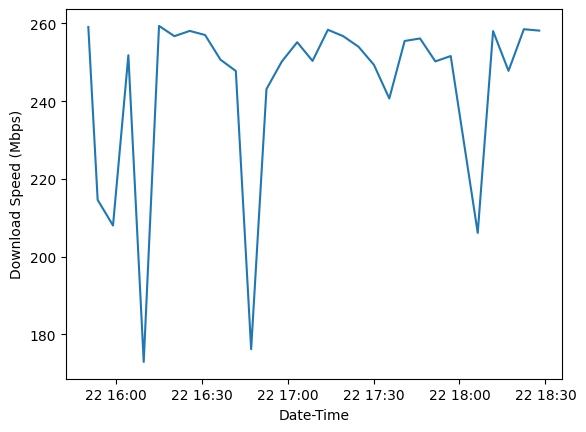

In [7]:
import seaborn as sns
sns.lineplot(data=pd.read_excel('internet_speeds.xlsx'),y='Download Speed (Mbps)', x='Date-Time')